## Introduction to Data Visualization with Matplotlib

In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# change the default console output settings in NumPy and pandas to improve readability
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

# Importing datasets 
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=["date"], index_col="date")
medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0)
summer_2016 = pd.read_csv('datasets/summer2016.csv')
austin_weather = pd.read_csv("datasets/austin_weather.csv", index_col="DATE")
weather = pd.read_csv("datasets/seattle_weather.csv", index_col="DATE")

# Some pre-processing on the weather datasets, including adding a month column
seattle_weather = weather[weather["STATION"] == "USW00094290"].copy()  
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
seattle_weather["MONTH"] = month 
austin_weather["MONTH"] = month

# Ensure both DataFrames have 12 rows before assigning the month names
if len(seattle_weather) == 12:
    seattle_weather.loc[:, "MONTH"] = month
else:
    print("Warning: Seattle weather DataFrame does not have 12 rows.")

if len(austin_weather) == 12:
    austin_weather.loc[:, "MONTH"] = month
else:
    print("Warning: Austin weather DataFrame does not have 12 rows.")

**Matplotlib API Reference:**

Choosing markers: https://matplotlib.org/stable/api/markers_api.html

Setting the linestyle: https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

Customizing annotations: https://matplotlib.org/users/annotations.html

Customizing figure styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

Visualizations gallery with source code: https://matplotlib.org/2.0.2/gallery.html

Creating three-dimensional visualizations: https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html

Visualizing data from images: https://matplotlib.org/2.0.2/users/image_tutorial.html

Interface for creating animations: https://matplotlib.org/stable/api/animation_api.html

### 1. Introduction to Matplotlib

> #### Introduction

#### Using the matplotlib.pyplot interface

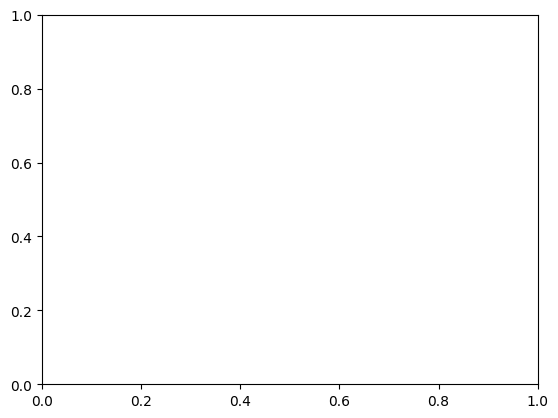

In [2]:
# Import the matplotlib.pyplot API
import matplotlib.pyplot as plt

# Create Figure and Axes objects
fig, ax = plt.subplots()

# Show the results, an empty set of axes
plt.show()

#### Adding data to an Axes object

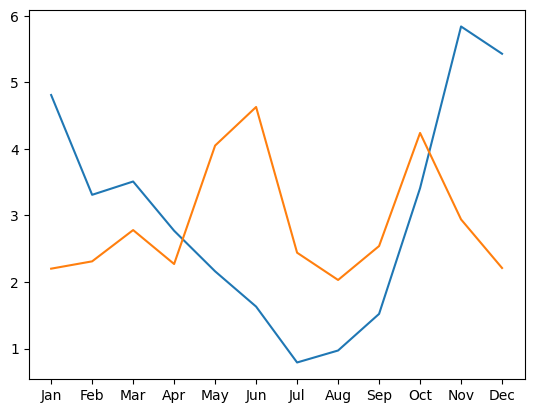

In [3]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create a Figure and Axes object
fig, ax = plt.subplots()

# Add data from the seattle_weather DataFrame
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# Add data from the austin_weather DataFrame
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

plt.show()

> #### Customizing plots

#### Customizing data appearance, axis labels, and adding titles

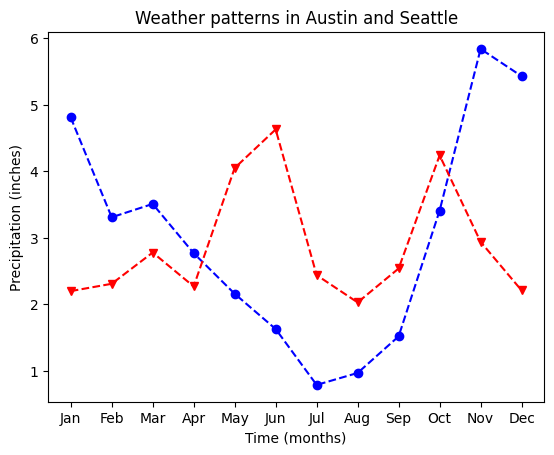

In [4]:
# Create Figure and Axes objects
fig, ax = plt.subplots()

# Plot seattle_weather, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"],
        color="b", marker="o", linestyle="--")

# Plot austin_weather, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"],
        color="r", marker="v", linestyle="--")

# Customise the x-axis label
ax.set_xlabel("Time (months)")

# Customise the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add a title
ax.set_title("Weather patterns in Austin and Seattle")

plt.show()

> #### Small multiples

#### Creating small multiples with plt.subplots

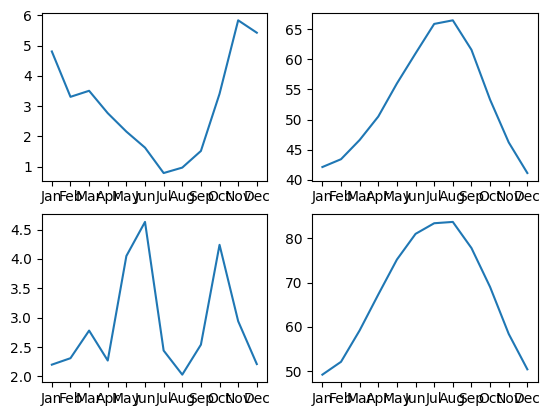

In [5]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2,2)

# In the top left (index 0,0) plot the Seattle precipitation
ax[0,0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# In the top right (index 0,1) plot the Seattle temperature
ax[0,1].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])

# In the bottom left and bottom right plot Austin precipitations and temperatures
ax[1,0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])
ax[1,1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])

plt.show()

#### Small multiples with shared y-axis

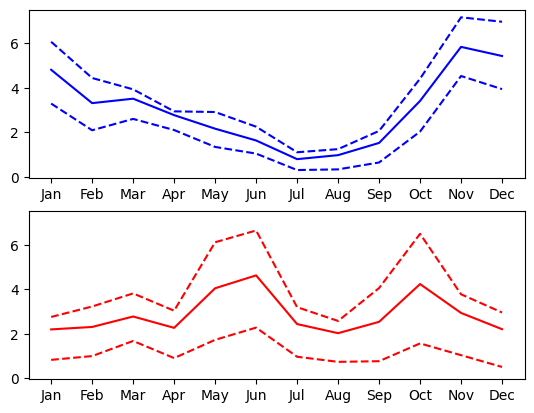

In [6]:
# Create a Figure with an array of two Axes objects that share their y-axis range
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle percipitation data in the top axes
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color="b")
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"], color="b", linestyle="--")
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"], color="b", linestyle="--")

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color="r")
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-25PCTL"], color="r", linestyle="--")
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-75PCTL"], color="r", linestyle="--")

plt.show()

### 2. Plotting time-series

> #### Plotting time-series data

#### Plot time-series data

In [7]:
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


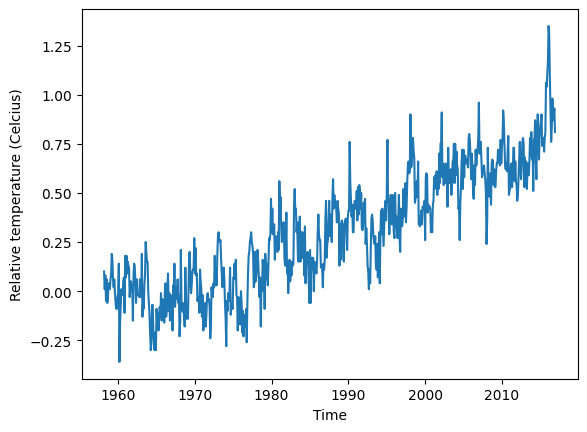

In [8]:
# Plot the time-series for "relative_temp"
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["relative_temp"])
ax.set_xlabel("Time")
ax.set_ylabel("Relative temperature (Celcius)")
plt.show()

#### Using a time index to zoom in

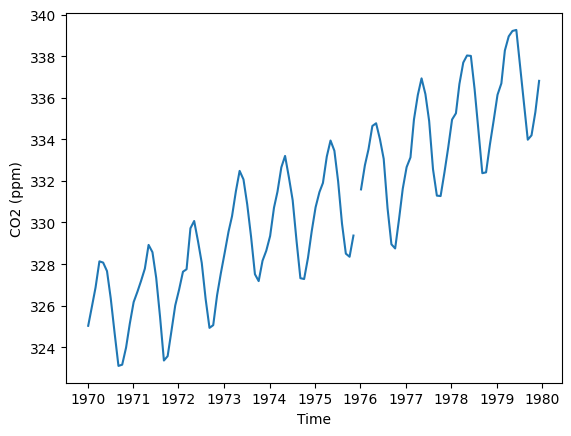

In [9]:
# Select the data between "1970-01-01" and "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Plot the "seventies" data for "co2"
fig, ax = plt.subplots()
ax.plot(seventies.index, seventies["co2"])
ax.set_xlabel("Time")
ax.set_ylabel("CO2 (ppm)")
plt.show()

> #### Plotting time-series with different variables

#### Plotting two variables

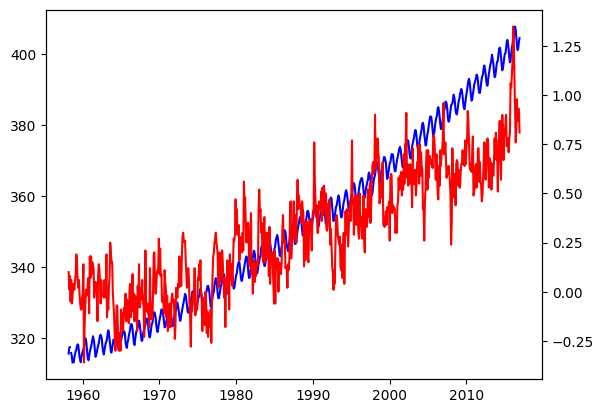

In [10]:
# Create Figure and Axes objects
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color="blue")

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color="red")

plt.show()

#### Defining a function that plots time-series data

In [11]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params("y", colors=color)

#### Using a plotting function

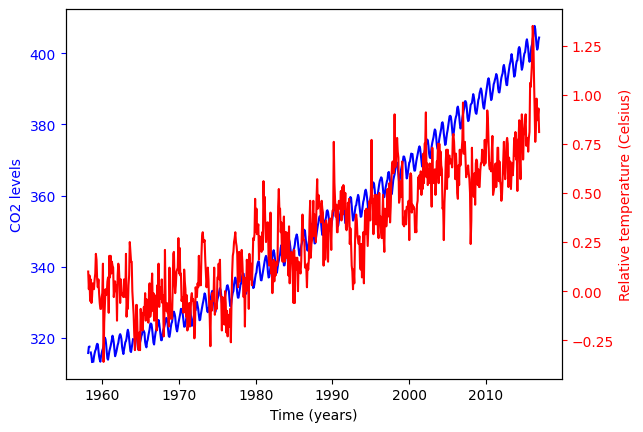

In [12]:
# Create Figure and Axes objects
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue 
plot_timeseries(ax, climate_change.index, climate_change["co2"], "blue", "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], "red", "Time (years)",
                "Relative temperature (Celsius)")

plt.show()

> #### Annotating time-series data

#### Annotating a part of time-series data

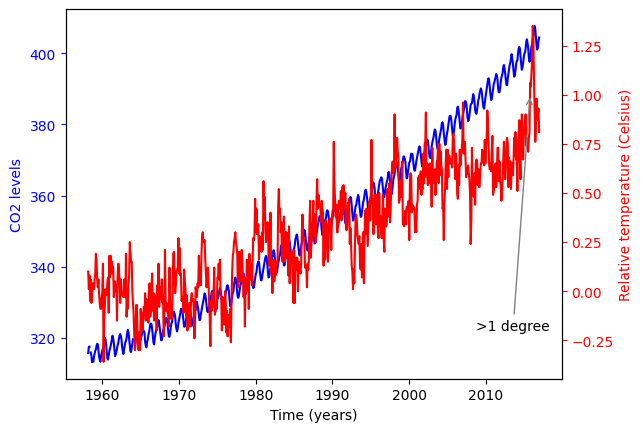

In [13]:
# Create Figure and Axes objects
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue 
plot_timeseries(ax, climate_change.index, climate_change["co2"], "blue", "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], "red", "Time (years)",
                "Relative temperature (Celsius)")

# Annotate the point when the temperature first rose to above 1 degree above the average
ax2.annotate(">1 degree", xy=(pd.Timestamp("2015-10-06"), 1),
             xytext=(pd.Timestamp("2008-10-06"), -0.2),
             arrowprops={"arrowstyle":"->", "color":"gray"})

plt.show()

### 3. Quantitative comparisons and statistical visualizations

> #### Quantitative comparisons: bar-charts

#### Bar chart

In [14]:
# Read CSV file into a DataFrame
medals = pd.read_csv("datasets\medals_by_country_2016.csv", index_col=0)
medals

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


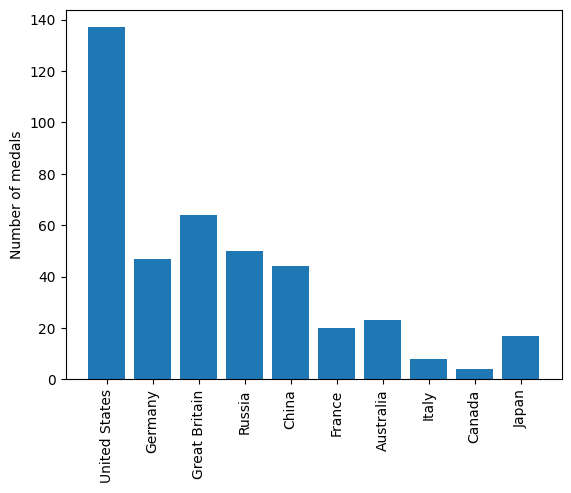

In [15]:
# Plot a bar-chart of gold medals as a function of country
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"])

# Set the number of x-axis ticks
ax.set_xticks(np.arange(len(medals.index)))

# Set and rotate the x-axis tick labels
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

#### Stacked bar chart

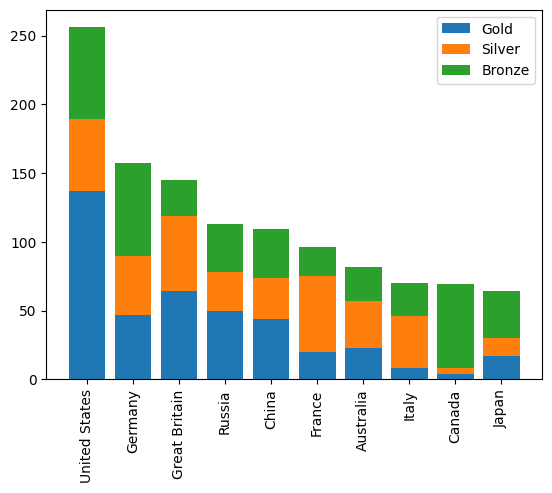

In [16]:
fix, ax = plt.subplots()

# Add bars for "Gold medals" with the label "Gold"
ax.bar(medals.index, medals["Gold"], label="Gold")

# Stack bars for "Silver medals" with label "Silver"
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")

# Stack bars for "Bronze medals" with label "Bronze"
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze")

# Set the number of x-ticks
ax.set_xticks(np.arange(len(medals.index)))

# Set and rotate the x-axis tick labels
ax.set_xticklabels(medals.index, rotation=90)

# Display the legend
ax.legend()

plt.show()

> #### Quantitative comparisons: histograms

#### Creating histograms

In [17]:
# Read CSV file into a DataFrame
events = pd.read_csv("datasets\summer2016.csv", index_col=0)
events.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver


In [18]:
# Extract information about the medallists in the men's rowing events
mens_rowing = events[events["Sport"] == "Rowing"]

# Extract information about the medallists in the men's gymnastics events
mens_gymnastics = events[events["Sport"] == "Gymnastics"]

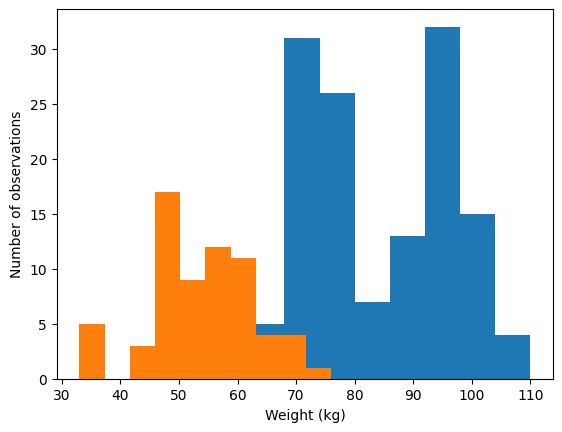

In [19]:
# Plot a histogram of "Weight" for mens_rowing
fig, ax =plt.subplots()
ax.hist(mens_rowing["Weight"])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"])

# Set x-axis and y-axis labels
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Number of observations")

plt.show()

#### "Step" histogram

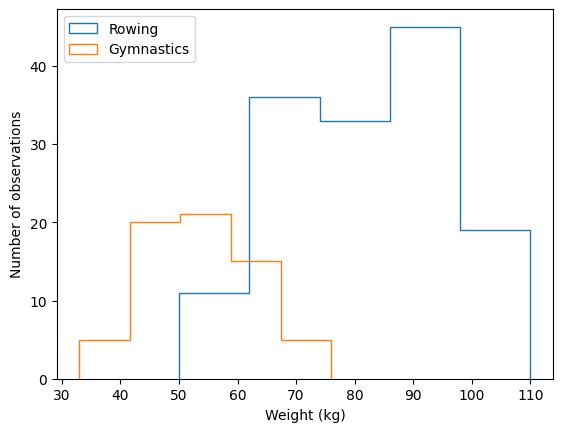

In [20]:
'''
Plot histograms of the "weight" columns of "mens_gymnastics" and "mens_rowing" DataFrames.  
Use the "histtype" argument to visualize the data using the "step" type. Set the number of  
bins to 5
'''
fig, ax = plt.subplots()
ax.hist(mens_rowing["Weight"], bins=5, histtype="step", label="Rowing")
ax.hist(mens_gymnastics["Weight"], bins=5, histtype="step", label="Gymnastics")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Number of observations")
ax.legend()
plt.show()

> #### Statistical plotting

Statistical plotting techniques add quantitative information for comparison  
into the visualization. 

Two of these techniques are:

* The use of error bars in plots
    * These are additional markers on a plot or bar chart  
    that tell us something about the distribution of the data.

* The boxplot

#### Adding error-bars to a bar chart

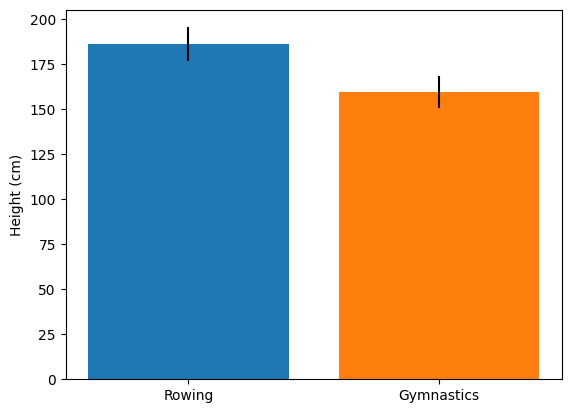

In [21]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean and an error-bar
# of its standard deviation
ax.bar("Rowing", mens_rowing["Height"].mean(),
       yerr=mens_rowing["Height"].std())

# Add a bar for the gymnastics "Height" column mean and an error-bar
# of its standard deviation
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(),
       yerr=mens_gymnastics["Height"].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

#### Adding error-bars to a plot

Both `seattle_weather` and `austin_weather` DataFrames have a column `"MONTH"` that has the names   
of the months, a column `"MLY-TAVG-NORMAL"` that has the average temperature in each month and a   
column `"MLY-TAVG-STDDEV"` that has the standard deviation of the temperatures across years.

Plot the mean temperature across months and add the standard deviation at each point as y errorbars.

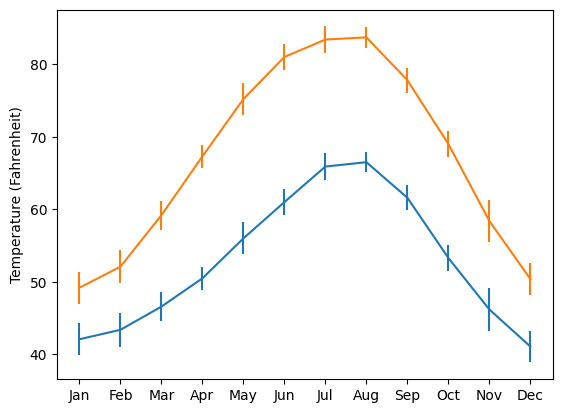

In [22]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"],
            yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"],
            yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

#### Creating boxplots

Boxplots provide additional information about the distribution of the data that they represent.   

They tell us what the median of the distribution is, what the inter-quartile range is and also   
what the expected range of approximately 99% of the data should be.   

Outliers beyond this range are particularly highlighted.

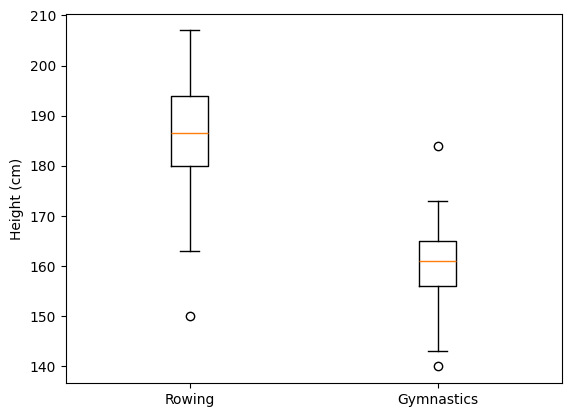

In [23]:
fig, ax = plt.subplots()

# Create a boxplot that contains the "Height" column for "mens_rowing"
# and "mens_gymnastics"

ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

> #### Quantitative comparisons: scatter plots

#### Simple scatter plot

Create a scatter plot of the `climate_change` data with `"co2"` on the x-axis,  
and `"relative_temp"` on the y-axis.

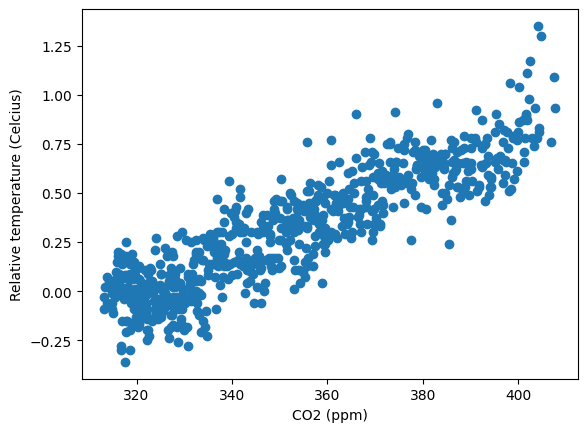

In [24]:
fig, ax = plt.subplots()

ax.scatter(climate_change["co2"], climate_change["relative_temp"])
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celcius)")
plt.show()

#### Encoding time by color

Visualize the climate_change dataset, plotting a scatter plot of the "co2" column,  
on the x-axis, against the "relative_temp" column, on the y-axis.

Encode time using the color dimension, with earlier times appearing as darker shades  
of blue and later times appearing as brighter shades of yellow.

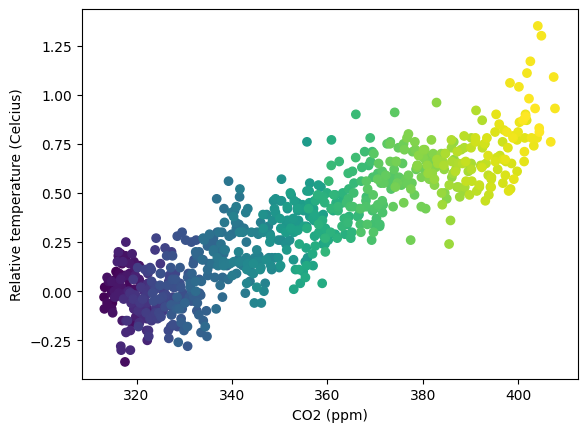

In [25]:
fig, ax = plt.subplots()

ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celcius)")
plt.show()

### 4. Sharing visualizations with others

> #### Prepare visualizations to share with others

#### Switching between styles

Selecting a style to use affects all of the visualizations that are created after   
this style is selected. To return the style to the default setting use "default".

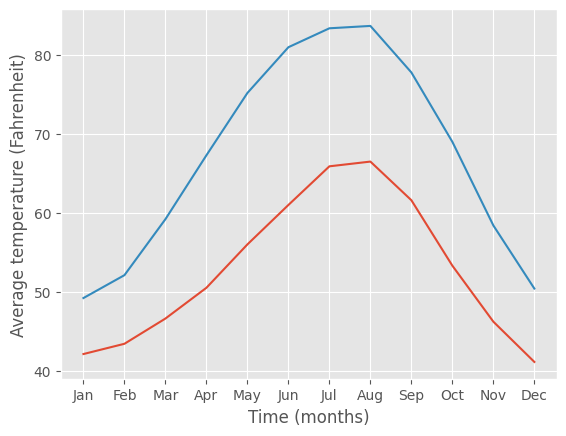

In [27]:
# Select the "ggplot" style
plt.style.use("ggplot")

# Plot the Seattle and Austin average monthly temperature
fig, ax = plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
ax.set_xlabel("Time (months)")
ax.set_ylabel("Average temperature (Fahrenheit)")
plt.show()

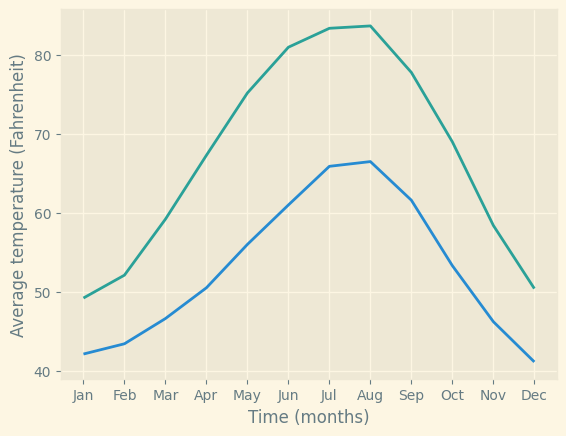

In [28]:
# Plot the same data using the "Solarize_Light2" style
plt.style.use("Solarize_Light2")

fig, ax = plt.subplots()
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
ax.set_xlabel("Time (months)")
ax.set_ylabel("Average temperature (Fahrenheit)")
plt.show()

> #### Saving visualizations

#### Save a figure with different resolutions

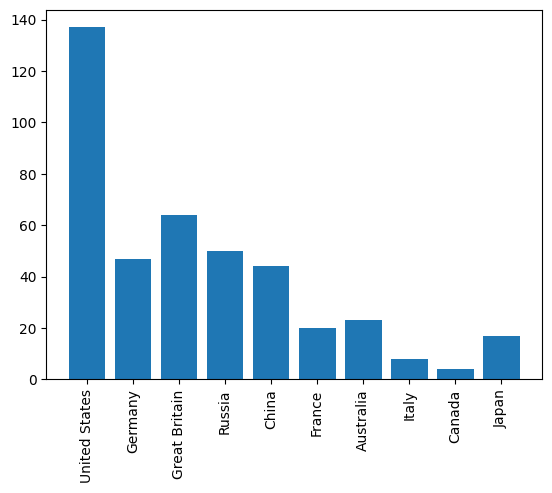

In [36]:
# Set visualization style to default
plt.style.use("default")

# Create a figure showing gold medals won by each country from the medals dataset
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"])

# Set the number of x-ticks
ax.set_xticks(np.arange(len(medals.index)))

# Rotate x-tick labels
ax.set_xticklabels(medals.index, rotation=90)
plt.show()

In [56]:
# Save the figure to a file using the default resolution
fig.savefig("images\my_figure.png")

In [57]:
# Save the figure to a file and set the resolution to 300dpi
fig.savefig("images\my_figure_300dpi.png", dpi=300)

#### Save a figure with different sizes

In [59]:
# Set the figure size as 3 x 5 inches before saving
fig.set_size_inches([3, 5])
fig.savefig("images\my_figure_3_5.png")

In [60]:
# Set the figure size as 5 x 3 inches before saving
fig.set_size_inches([5, 3])
fig.savefig("images\my_figure_5_3.png")

> #### Automating figures from data

#### Unique values of a column

In [43]:
# Extract the "Sport" column from the "summer_2016" DataFrame
sports_column = summer_2016["Sport"]

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
sports

array(['Rowing', 'Taekwondo', 'Handball', 'Wrestling', 'Gymnastics',
       'Swimming', 'Basketball', 'Boxing', 'Volleyball', 'Athletics',
       'Rugby Sevens', 'Judo', 'Rhythmic Gymnastics', 'Weightlifting',
       'Equestrianism', 'Badminton', 'Water Polo', 'Football', 'Fencing',
       'Shooting', 'Sailing', 'Beach Volleyball', 'Canoeing', 'Hockey',
       'Cycling', 'Tennis', 'Diving', 'Table Tennis', 'Triathlon',
       'Archery', 'Synchronized Swimming', 'Modern Pentathlon',
       'Trampolining', 'Golf'], dtype=object)

In [45]:
# Select only the first 10 sports in the array
sports = sports[:10]
sports

array(['Rowing', 'Taekwondo', 'Handball', 'Wrestling', 'Gymnastics',
       'Swimming', 'Basketball', 'Boxing', 'Volleyball', 'Athletics'],
      dtype=object)

#### Automating visualizations

Visualize the mean weight of athletes who participated in the various sports in   
the `"sports"` array. Use the `"Weight"` column of the `"summer_2016"` DataFrame

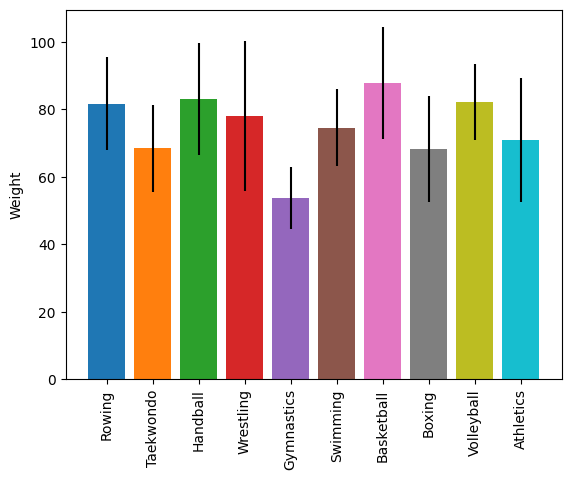

In [55]:
fig, ax = plt.subplots()

# Loop over the different sports in the "sports" array
for sport in sports:
    # Extract rows for sport
    sport_df = summer_2016[summer_2016["Sport"] == sport]
    # Add a bar for the mean "Weight" with std y error bar
    ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")

ax.set_xticks(np.arange(len(sports)))
ax.set_xticklabels(sports, rotation=90)

# Save the figure to a file
fig.savefig("images\sports_weights.png")